# Stock Prices Prediction - Feature Enginnering

* Feature engineering enables you to build more complex models than you could with only raw data. It also allows you to build interpretable models from any amount of data. Feature selection will help you limit these features to a manageable number.


In [1]:
# Ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import modules
import pandas as pd
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Data file paths
path = os.path.join('','data/')

# Stock data files
jpm_stock = path + 'JPM_stock.csv'
jpm_div = path + 'JPM_div.csv'
jpm_split = path + 'JPM_split.csv'
google_stock = path + 'GOOG_stock.csv'
google_div = path + 'GOOG_split.csv'

In [3]:
# Load stock fils
jpm_df = pd.read_csv(jpm_stock, parse_dates=[0])
google_df = pd.read_csv(google_stock, parse_dates=[0])

In [4]:
# Review min, max date and date format for selected stocks
print("JPM stock data date range:",jpm_df.Date.min(),jpm_df.Date.max())
print("GOOGLE stock data date range:",google_df.Date.min(),google_df.Date.max())

JPM stock data date range: 1980-03-17 00:00:00 2020-11-20 00:00:00
GOOGLE stock data date range: 2004-08-19 00:00:00 2020-11-20 00:00:00


In [5]:
# Get start date - max of min date for stock
start_date = np.max([jpm_df.Date.min(),google_df.Date.min()])
start_date

Timestamp('2004-08-19 00:00:00')

In [6]:
# Looking at the selected stocks, we will need to select min data as '08/19/2004' 

In [7]:
# Create date filter
jpm_cond = jpm_df['Date'] >= start_date
google_cond = google_df['Date'] >= start_date

In [8]:
# Filter date for all data sets so we have same start date and end date
jpm_df= jpm_df[jpm_cond]
google_df= google_df[google_cond]

In [9]:
# Sample data for JPM
jpm_df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
6166,2004-08-19,38.320000,38.320000,37.849998,38.000000,24.372349,7859600
6167,2004-08-20,37.970001,38.799999,37.919998,38.650002,24.789234,9293600
6168,2004-08-23,38.750000,38.880001,38.470001,38.549999,24.725105,8000900


#### Overiew of the data columns

* There are multiple columns in the dataset – Date, Open, High, Low, close and Volume.

* The Open and Close represents the starting and ending trade price on a particular day.

* High and Low represents the maximum and minimum stock price for the day.

* Volume is the number of stocks bought or sold on a particular day.

All data files have 4095 rows with no null values.

In [10]:
# Now we know all df's have date column and same record count i.e. 2620. Let's change date format for all df's
jpm_df['Date']= pd.to_datetime(jpm_df.Date,format='%Y-%m-%d')
google_df['Date']= pd.to_datetime(google_df.Date,format='%Y-%m-%d')

In [11]:
# Verify Sample result - as all df's have same columns, we dont need to check all df's
jpm_df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
6166,2004-08-19,38.320000,38.320000,37.849998,38.000000,24.372349,7859600
6167,2004-08-20,37.970001,38.799999,37.919998,38.650002,24.789234,9293600
6168,2004-08-23,38.750000,38.880001,38.470001,38.549999,24.725105,8000900


* The closing price of a stock is only its cash value at day's end, whereas the adjusted closing price factors in things like dividends, stock splits and new stock offerings. However we will use stock lcosing price to caluclate features as that is the price the stock open's with in next day traing session.

* The 50-day moving average is a popular technical indicator which investors use to analyze price trends. It is simply a security's average closing price over the last 50 days. Now, let’s calculate 50 day moving average as a new feature that will help us to predict our target stock value.

In [12]:
# Let's calculate moving average
jpm_df['moving_avg']= jpm_df['Close'].rolling(window=50,min_periods=0).mean()
google_df['moving_avg']= google_df['Close'].rolling(window=50,min_periods=0).mean()

* Note: The 50-day moving average is perceived to be the dividing line between a stock that is technically healthy and one that is not. Furthermore, the percentage of stocks above their 50-day moving average helps determine the overall health of the market.

Now, we will try to obtain two more features: Volume daily rate of change (increase/decrease) and Closing price daily rate of change (increase/decrease)

In [13]:
# Variable intialization
i=1
jpm_volume_rate_change = [0]
jpm_close_rate_change = [0]
google_volume_rate_change = [0]
google_close_rate_change = [0]

# Loop through df length
while i<len(jpm_df):
    
    jpm_volume_rate_change.append(jpm_df.iloc[i]['Volume'] - jpm_df.iloc[i-1]['Volume'])
    jpm_close_rate_change.append(jpm_df.iloc[i]['Close'] - jpm_df.iloc[i-1]['Close'])

    google_volume_rate_change.append(google_df.iloc[i]['Volume'] - google_df.iloc[i-1]['Volume'])
    google_close_rate_change.append(google_df.iloc[i]['Close'] - google_df.iloc[i-1]['Close'])

    i+=1

# Append values to df    
jpm_df['volume_rate'] = jpm_volume_rate_change
jpm_df['closing_rate'] = jpm_close_rate_change
google_df['volume_rate'] = google_volume_rate_change
google_df['closing_rate'] = google_close_rate_change

In [14]:
# View sample data 
google_df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,moving_avg,volume_rate,closing_rate
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300,49.982655,0,0.000000
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800,51.967712,-21928500,3.970115
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800,52.810387,-4600000,0.542965


In [15]:
# View sample data 
jpm_df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,moving_avg,volume_rate,closing_rate
6166,2004-08-19,38.320000,38.320000,37.849998,38.000000,24.372349,7859600,38.000000,0,0.000000
6167,2004-08-20,37.970001,38.799999,37.919998,38.650002,24.789234,9293600,38.325001,1434000,0.650002
6168,2004-08-23,38.750000,38.880001,38.470001,38.549999,24.725105,8000900,38.400000,-1292700,-0.100003


#### Feature selection: 
* It is the process of reducing the number of input variables when developing a predictive model.

* It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model. 


In [16]:
# Let's set Date as index column 
jpm_df = jpm_df.set_index('Date')
google_df = google_df.set_index('Date')

#### PCA Analysis functions

In [17]:
# Get feature info and chart a graph to understand component impact on variance
def getFetureInfo(X):
    
    # Create a StandardScaler object
    sc = StandardScaler()

    # Standardize the data
    X_std = sc.fit_transform(X) 

    # Create PCA object and fit scaled data
    pca = PCA()
    X_pca = pca.fit(X_std)

    # Plot the chart to understand component impact on variance
    plt.plot(np.cumsum(pca.explained_variance_ratio_))

    # Label axis
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.show()
    
    # return scaled data
    return X_std

In [18]:
# Let's get important feature count - which features are contributing most to the components
def getPCACount(X_std):
    # Other way to find out component count is to use n_componenet value as 0.99
    pca = PCA(n_components = 0.99)

    # Fit and reduce dimensions
    X_pca = pca.fit_transform(X_std) 

    # Print # of components
    print("Number of PCA Componenets suggested: " , pca.n_components_)
    
    # return pca 
    return pca

In [19]:
# Let's get important features info - which features are contributing most to the components
def getPCAFeatures(pca):
    # Number of component
    n_pcs= pca.n_components_ 

    # Get the index of the most important feature on each component
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

    #  Get the column names
    initial_feature_names = X.columns

    # Get the most important feature names
    most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

    # Import features
    print("Important features: " , most_important_names)

#### JPM Stock PCA Analysis

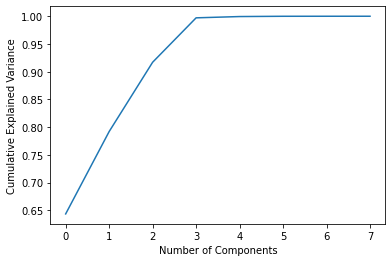

Number of PCA Componenets suggested:  4
Important features:  ['Low', 'volume_rate', 'closing_rate', 'Volume']


In [20]:
# For JPM stock
X = jpm_df.drop(columns=['Close'], axis=1)
X_std = getFetureInfo(X)
pca = getPCACount(X_std)
getPCAFeatures(pca)

#### Google Stock PCA Analysis

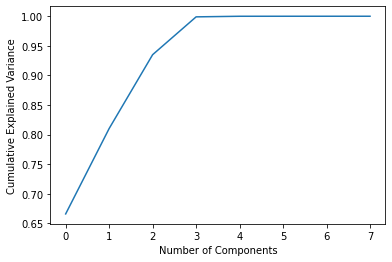

Number of PCA Componenets suggested:  4
Important features:  ['Low', 'volume_rate', 'closing_rate', 'Volume']


In [21]:
# For Google stock
X = google_df.drop(columns=['Close'], axis=1)
X_std = getFetureInfo(X)
pca = getPCACount(X_std)
getPCAFeatures(pca)

#### Summary:
* We will use Date, Low, volume_rate, closing_rate and Volume as features to predict Close stock price.

In [22]:
# For JPM stock
X_jpm = jpm_df[['Low', 'volume_rate', 'closing_rate', 'Volume']]
y_jpm = jpm_df['Close']

# For google stock
X_google = google_df[['Low', 'volume_rate', 'closing_rate', 'Volume']]
y_google = google_df['Close']

In [23]:
# Get scaler reference
scaler = StandardScaler()

# Fit data
scaler.fit(X_jpm)
scaler.fit(X_google)

# Check the shape of features
print("JPM data shape", X_jpm.shape)
print("GOOGLE data shape", X_google.shape)

JPM data shape (4095, 4)
GOOGLE data shape (4095, 4)


In [24]:
# Transform features
X_jpm = scaler.transform(X_jpm)
X_google =  scaler.transform(X_google)

In [25]:
# Split data
# JPM Stock
X_train_jpm, X_test_jpm, y_train_jpm, y_test_jpm = train_test_split(X_jpm, y_jpm, test_size=.25, random_state=420)

# Print shape of train data
print("JPM training feature shape", X_train_jpm.shape)
print("JPM training dependent variable shape", y_train_jpm.shape)
print("JPM test feature shape", X_test_jpm.shape)
print("JPM test dependent variable shape", y_test_jpm.shape)

print(" ")
# Google Stock
X_train_google, X_test_google, y_train_google, y_test_google = train_test_split(X_jpm, y_jpm, test_size=.25, random_state=420)

# Print shape of train data
print("Google training feature shape", X_train_google.shape)
print("Google training dependent variable shape", y_train_google.shape)
print("Google test feature shape", X_test_google.shape)
print("Google test dependent variable shape", y_test_google.shape)

JPM training feature shape (3071, 4)
JPM training dependent variable shape (3071,)
JPM test feature shape (1024, 4)
JPM test dependent variable shape (1024,)
 
Google training feature shape (3071, 4)
Google training dependent variable shape (3071,)
Google test feature shape (1024, 4)
Google test dependent variable shape (1024,)
